In [189]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler,LabelEncoder,OneHotEncoder
from sklearn.model_selection import cross_val_score,StratifiedKFold,RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix,precision_score,f1_score,recall_score

Get testing data from CSVs, testing data is results from 2024

In [190]:
cleaned_data = pd.read_csv('/content/cleaned_data.csv')
quali = pd.read_csv('qualifying.csv')
drivers = pd.read_csv('drivers.csv')

In [191]:
cleaned_data.columns

Index(['GP_name', 'quali_pos', 'constructor', 'driver', 'position',
       'driver_reliability', 'constructor_reliability', 'active_driver',
       'active_constructor', 'dob'],
      dtype='object')

In [192]:
cleaned_data['istest'] = 0

In [193]:
#get race qualifying info for test races
bahrain_gp_quali = quali[quali['raceId'] == 1121]
bahrain_gp_drivers = []
saudi_gp_quali = quali[quali['raceId'] == 1122]
saudi_gp_drivers = []
australia_gp_quali = quali[quali['raceId'] == 1123]
australia_gp_drivers = []
japan_gp_quali = quali[quali['raceId'] == 1124]
japan_gp_drivers = []
chinese_gp_quali = quali[quali['raceId'] == 1125]
chinese_gp_drivers = []

#get drivers of bahrain
for driver_id in bahrain_gp_quali['driverId']:
    driver_row = drivers.loc[drivers['driverId'] == driver_id]
    forename = str(driver_row['forename'].values[0])
    surname = str(driver_row['surname'].values[0])
    driver_name = forename + ' ' + surname
    bahrain_gp_drivers.append(driver_name)

#get drivers of saudi
for driver_id in saudi_gp_quali['driverId']:
    driver_row = drivers.loc[drivers['driverId'] == driver_id]
    forename = str(driver_row['forename'].values[0])
    surname = str(driver_row['surname'].values[0])
    driver_name = forename + ' ' + surname
    saudi_gp_drivers.append(driver_name)

#get drivers of australia
for driver_id in australia_gp_quali['driverId']:
    driver_row = drivers.loc[drivers['driverId'] == driver_id]
    forename = str(driver_row['forename'].values[0])
    surname = str(driver_row['surname'].values[0])
    driver_name = forename + ' ' + surname
    australia_gp_drivers.append(driver_name)

australia_gp_drivers.append('Logan Sargeant')

#get drivers of japan
for driver_id in japan_gp_quali['driverId']:
    driver_row = drivers.loc[drivers['driverId'] == driver_id]
    forename = str(driver_row['forename'].values[0])
    surname = str(driver_row['surname'].values[0])
    driver_name = forename + ' ' + surname
    japan_gp_drivers.append(driver_name)
#get drivers of chiina
for driver_id in chinese_gp_quali['driverId']:
    driver_row = drivers.loc[drivers['driverId'] == driver_id]
    forename = str(driver_row['forename'].values[0])
    surname = str(driver_row['surname'].values[0])
    driver_name = forename + ' ' + surname
    chinese_gp_drivers.append(driver_name)

In [194]:
#get driiver reliabilitis for test races
clean = pd.read_csv("cleaned_data.csv")
clean_unique = clean.drop_duplicates(subset=['driver'])

bahrain_gp_driver_reliabilities = []
saudi_gp_driver_reliabilities = []
australia_gp_driver_reliabilities = []
japan_gp_driver_reliabilities = []
chinese_gp_driver_reliabilities = []

#get bahrain driver reliabilities
for driver in bahrain_gp_drivers:
    driver_row = clean_unique.loc[clean_unique['driver'] == driver]
    reliability = driver_row['driver_reliability'].values[0]
    bahrain_gp_driver_reliabilities.append(reliability)

#get australia driver reliabilities
for driver in saudi_gp_drivers:
    driver_row = clean_unique.loc[clean_unique['driver'] == driver]
    #use sainz reliability as Oliver Beaermans since its his first race
    if(driver == 'Oliver Bearman'):
      driver_row = clean_unique.loc[clean_unique['driver'] == 'Carlos Sainz']
    reliability = driver_row['driver_reliability'].values[0]
    saudi_gp_driver_reliabilities.append(reliability)

#get australia driver reliabilities
for driver in australia_gp_drivers:
    driver_row = clean_unique.loc[clean_unique['driver'] == driver]
    reliability = driver_row['driver_reliability'].values[0]
    australia_gp_driver_reliabilities.append(reliability)

#get japan driver reliabilities
for driver in japan_gp_drivers:
    driver_row = clean_unique.loc[clean_unique['driver'] == driver]
    reliability = driver_row['driver_reliability'].values[0]
    japan_gp_driver_reliabilities.append(reliability)

#get chinese driver reliabilities
for driver in chinese_gp_drivers:
    driver_row = clean_unique.loc[clean_unique['driver'] == driver]
    reliability = driver_row['driver_reliability'].values[0]
    chinese_gp_driver_reliabilities.append(reliability)


In [195]:
#specify constrcutors in qualifying order for each race
bahrain_gp_constructors = ['Red Bull', 'Ferrari', 'Mercedes', 'Ferrari', 'Red Bull', 'Aston Martin', 'McLaren', 'McLaren', 'Mercedes', 'Haas F1 Team', 'Visa Cashapp Redbull', 'Aston Martin', 'Williams', 'Visa Cashapp Redbull', 'Haas F1 Team', 'Kick Sauber', 'Kick Sauber', 'Williams', 'Alpine', 'Alpine']
saudi_gp_constructors = ['Red Bull', 'Ferrari', 'Red Bull', 'Aston Martin', 'McLaren', 'McLaren', 'Mercedes', 'Mercedes', 'Visa Cashapp Redbull', 'Aston Martin', 'Ferrari', 'Williams', 'Haas F1 Team', 'Visa Cashapp Redbull', 'Haas F1 Team', 'Kick Sauber', 'Alpine', 'Alpine', 'Williams', 'Kick Sauber']
australia_gp_constructors = ['Red Bull', 'Ferrari', 'Red Bull', 'McLaren', 'Ferrari', 'McLaren', 'Mercedes', 'Visa Cashapp Redbull', 'Aston Martin', 'Aston Martin', 'Mercedes', 'Williams', 'Kick Sauber', 'Haas F1 Team', 'Alpine', 'Haas F1 Team', 'Alpine', 'Visa Cashapp Redbull', 'Kick Sauber','Williams']
japan_gp_constructors = ['Red Bull', 'Red Bull', 'McLaren', 'Ferrari', 'Aston Martin', 'McLaren', 'Mercedes', 'Ferrari', 'Mercedes', 'Visa Cashapp Redbull', 'Visa Cashapp Redbull', 'Haas F1 Team', 'Kick Sauber', 'Williams', 'Alpine', 'Aston Martin', 'Alpine', 'Haas F1 Team', 'Williams', 'Kick Sauber' ]
chinese_gp_constructors = ["Red Bull", "Red Bull", "Aston Martin", "McLaren", "McLaren", "Ferrari", "Ferrari", "Mercedes", "Haas F1 Team", "Kick Sauber", "Aston Martin", "Visa Cashapp Redbull", "Alpine", "Williams", "Alpine", "Kick Sauber", "Haas F1 Team", "Mercedes", "Visa Cashapp Redbull", "Williams"]



clean_unique_2 = clean.drop_duplicates(subset=['constructor'])

# assign constructor reliabilities
bahrain_gp_constructor_reliabilities = []
saudi_gp_constructor_reliabilities = []
australia_gp_constructor_reliabilities = []
japan_gp_constructor_reliabilities = []
chinese_gp_constructor_reliabilities = []

#get bahrain constructor reliabilities
for constructor in bahrain_gp_constructors:
    constructor_row = clean_unique_2.loc[clean_unique_2['constructor'] == constructor]
    reliability = constructor_row['constructor_reliability'].values[0]
    bahrain_gp_constructor_reliabilities.append(reliability)

#get saudi constructor reliabilities
for constructor in saudi_gp_constructors:
    constructor_row = clean_unique_2.loc[clean_unique_2['constructor'] == constructor]
    reliability = constructor_row['constructor_reliability'].values[0]
    saudi_gp_constructor_reliabilities.append(reliability)

#get chinese constructor reliabilities
for constructor in australia_gp_constructors:
    constructor_row = clean_unique_2.loc[clean_unique_2['constructor'] == constructor]
    reliability = constructor_row['constructor_reliability'].values[0]
    australia_gp_constructor_reliabilities.append(reliability)

#get chinese constructor reliabilities
for constructor in japan_gp_constructors:
    constructor_row = clean_unique_2.loc[clean_unique_2['constructor'] == constructor]
    reliability = constructor_row['constructor_reliability'].values[0]
    japan_gp_constructor_reliabilities.append(reliability)

#get chinese constructor reliabilities
for constructor in chinese_gp_constructors:
    constructor_row = clean_unique_2.loc[clean_unique_2['constructor'] == constructor]
    reliability = constructor_row['constructor_reliability'].values[0]
    chinese_gp_constructor_reliabilities.append(reliability)


In [196]:
#compile bahrain data
bahrain_data = {
    'GP_name': ['Bahrain International Circuit','Bahrain International Circuit','Bahrain International Circuit','Bahrain International Circuit','Bahrain International Circuit','Bahrain International Circuit','Bahrain International Circuit','Bahrain International Circuit','Bahrain International Circuit','Bahrain International Circuit','Bahrain International Circuit','Bahrain International Circuit','Bahrain International Circuit','Bahrain International Circuit','Bahrain International Circuit','Bahrain International Circuit','Bahrain International Circuit','Bahrain International Circuit','Bahrain International Circuit','Bahrain International Circuit'],
    'quali_pos': [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20],
    'constructor': bahrain_gp_constructors,
    'driver': bahrain_gp_drivers,
    'driver_reliability': bahrain_gp_driver_reliabilities,
    'constructor_reliability': bahrain_gp_constructor_reliabilities,
    'active_driver': [1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1],
    'active_constructor': [1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1],
    'dob': [1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1],
    'position': [1,4,5,3,2,9,6,8,7,16,14,10,15,13,12,19,11,20,17,18]
}

#compile saudi data
saudi_data = {
    'GP_name': ['Jeddah Corniche Circuit','Jeddah Corniche Circuit','Jeddah Corniche Circuit','Jeddah Corniche Circuit','Jeddah Corniche Circuit','Jeddah Corniche Circuit','Jeddah Corniche Circuit','Jeddah Corniche Circuit','Jeddah Corniche Circuit','Jeddah Corniche Circuit','Jeddah Corniche Circuit','Jeddah Corniche Circuit','Jeddah Corniche Circuit','Jeddah Corniche Circuit','Jeddah Corniche Circuit','Jeddah Corniche Circuit','Jeddah Corniche Circuit','Jeddah Corniche Circuit','Jeddah Corniche Circuit','Jeddah Corniche Circuit'],
    'quali_pos': [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20],
    'constructor': saudi_gp_constructors,
    'driver': saudi_gp_drivers,
    'driver_reliability': saudi_gp_driver_reliabilities,
    'constructor_reliability': saudi_gp_constructor_reliabilities,
    'active_driver': [1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1],
    'active_constructor': [1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1],
    'dob': [1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1],
    'position': [1,3,2,5,4,8,6,9,15,19,7,11,12,16,10,17,13,20,14,18]
}

#compile australia data
australia_data = {
    'GP_name': ['Albert Park Grand Prix Circuit','Albert Park Grand Prix Circuit','Albert Park Grand Prix Circuit','Albert Park Grand Prix Circuit','Albert Park Grand Prix Circuit','Albert Park Grand Prix Circuit','Albert Park Grand Prix Circuit','Albert Park Grand Prix Circuit','Albert Park Grand Prix Circuit','Albert Park Grand Prix Circuit','Albert Park Grand Prix Circuit','Albert Park Grand Prix Circuit','Albert Park Grand Prix Circuit','Albert Park Grand Prix Circuit','Albert Park Grand Prix Circuit','Albert Park Grand Prix Circuit','Albert Park Grand Prix Circuit','Albert Park Grand Prix Circuit','Albert Park Grand Prix Circuit','Albert Park Grand Prix Circuit'],
    'quali_pos': [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20],
    'constructor': australia_gp_constructors,
    'driver': australia_gp_drivers,
    'driver_reliability': australia_gp_driver_reliabilities,
    'constructor_reliability': australia_gp_constructor_reliabilities,
    'active_driver': [1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1],
    'active_constructor': [1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1],
    'dob': [1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1],
    'position': [19,1,5,3,2,4,17,7,6,8,18,11,14,10,16,9,13,12,15,20]
}

#compile japan data
japan_data = {
    'GP_name': ['Suzuka Circuit','Suzuka Circuit','Suzuka Circuit','Suzuka Circuit','Suzuka Circuit','Suzuka Circuit','Suzuka Circuit','Suzuka Circuit','Suzuka Circuit','Suzuka Circuit','Suzuka Circuit','Suzuka Circuit','Suzuka Circuit','Suzuka Circuit','Suzuka Circuit','Suzuka Circuit','Suzuka Circuit','Suzuka Circuit','Suzuka Circuit','Suzuka Circuit'],
    'quali_pos': [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20],
    'constructor': japan_gp_constructors,
    'driver': japan_gp_drivers,
    'driver_reliability': japan_gp_driver_reliabilities,
    'constructor_reliability': japan_gp_constructor_reliabilities,
    'active_driver': [1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1],
    'active_constructor': [1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1],
    'dob': [1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1],
    'position': [1,2,5,3,6,8,9,4,7,10,19,11,14,20,15,12,16,13,17,18]
}

#compile chinese data
chinese_data = {
    'GP_name': ['Shanghai International Circuit', 'Shanghai International Circuit', 'Shanghai International Circuit', 'Shanghai International Circuit', 'Shanghai International Circuit', 'Shanghai International Circuit', 'Shanghai International Circuit', 'Shanghai International Circuit', 'Shanghai International Circuit', 'Shanghai International Circuit', 'Shanghai International Circuit', 'Shanghai International Circuit', 'Shanghai International Circuit', 'Shanghai International Circuit', 'Shanghai International Circuit', 'Shanghai International Circuit', 'Shanghai International Circuit', 'Shanghai International Circuit', 'Shanghai International Circuit', 'Shanghai International Circuit'],
    'quali_pos': [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20],
    'constructor': chinese_gp_constructors,
    'driver': chinese_gp_drivers,
    'driver_reliability': chinese_gp_driver_reliabilities,
    'constructor_reliability': chinese_gp_constructor_reliabilities,
    'active_driver': [1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1],
    'active_constructor': [1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1],
    'dob': [1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1],
    'position': [1,3,7,2,8,4,5,6,10,20,15,18,11,12,13,14,16,9,20,17]
}

In [197]:
#compress test data into one data frame
bahrain_data = pd.DataFrame(bahrain_data)
saudi_data = pd.DataFrame(saudi_data)
australia_data = pd.DataFrame(australia_data)
japan_data = pd.DataFrame(japan_data)
chinese_data = pd.DataFrame(chinese_data)

#set istest to 1 for all of these data frames
bahrain_data['istest'] = 1
saudi_data['istest'] = 1
australia_data['istest'] = 1
japan_data['istest'] = 1
chinese_data['istest'] = 1

In [198]:
#concat test data to full data set
data = pd.concat([cleaned_data, bahrain_data])
data = pd.concat([data, saudi_data])
data = pd.concat([data, australia_data])
data = pd.concat([data, japan_data])
data = pd.concat([data,chinese_data])
data

,GP_name,quali_pos,constructor,driver,position,driver_reliability,constructor_reliability,active_driver,active_constructor,dob,istest
0,Albert Park Grand Prix Circuit,10,Alpine,Fernando Alonso,12,0.942935,0.565996,1,1,1981-07-29,0
1,Albert Park Grand Prix Circuit,11,Alpine,Fernando Alonso,12,0.942935,0.565996,1,1,1981-07-29,0
2,Albert Park Grand Prix Circuit,3,Alpine,Fernando Alonso,3,0.942935,0.565996,1,1,1981-07-29,0
3,Albert Park Grand Prix Circuit,13,Alpine,Fernando Alonso,13,0.942935,0.565996,1,1,1981-07-29,0
4,Albert Park Grand Prix Circuit,5,Alpine,Fernando Alonso,5,0.942935,0.565996,1,1,1981-07-29,0
...,...,...,...,...,...,...,...,...,...,...,...
15,Shanghai International Circuit,16,Kick Sauber,Guanyu Zhou,14,0.938776,0.414244,1,1,1,1
16,Shanghai International Circuit,17,Haas F1 Team,Kevin Magnussen,16,0.916667,0.384164,1,1,1,1
17,Shanghai International Circuit,18,Mercedes,Lewis Hamilton,9,0.943620,0.897521,1,1,1,1
18,Shanghai International Circuit,19,Visa Cashapp Redbull,Yuki Tsunoda,20,0.915493,0.485190,1,1,1,1


In [266]:
#get laps based on active drivers
lap_times = pd.read_csv('lap_times.csv')
driver_names= ['Lewis Hamilton','George Russell','Fernando Alonso','Lance Stroll',
               'Max Verstappen', 'Sergio Pérez','Carlos Sainz','Charles Leclerc',
               'Oscar Piastri','Lando Norris','Daniel Ricciardo','Yuki Tsunoda',
              'Nico Hülkenberg','Kevin Magnussen','Valtteri Bottas','Guanyu Zhou',
               'Pierre Gasly','Esteban Ocon','Logan Sargeant','Alexander Albon']
active_drivers = [1,847,4,840,830,815,832,844,857,846,817,852,807,825,822,855,842,839,858,848]

In [271]:
#compute avg lap per driver and avg lap overall to figure out pace
avgLap = []
for driver in active_drivers:
  races = lap_times[lap_times['driverId'] == driver]['milliseconds']
  avgLap.append(np.mean(races))

overall_avg = np.mean(avgLap)
diff = avgLap - overall_avg
diff

array([ -436.66717505, -1581.75663053, -1133.70923168, -1096.65526376,
       -1400.0931694 ,   967.4795456 ,  -624.80346951, -1424.09841279,
        1902.51463179,  -300.30729557,  1157.47209883,  2543.5762015 ,
        1587.22360835,   263.10640558,   133.9656851 ,    90.355163  ,
       -1013.44493692,   179.93974211,  2382.80390035, -2196.90139698])

In [267]:
def getPace(x):
  index = 0
  for driver in driver_names:
    if x == driver:
      return diff[index]
    if x == 'Oliver Bearman':
      return diff[6]
    else:
      index = index + 1

In [202]:
#append each drivers pace to dataset
data['pace'] = data['driver'].apply(lambda x: getPace(x))
data

,GP_name,quali_pos,constructor,driver,position,driver_reliability,constructor_reliability,active_driver,active_constructor,dob,istest,pace
0,Albert Park Grand Prix Circuit,10,Alpine,Fernando Alonso,12,0.942935,0.565996,1,1,1981-07-29,0,-1133.709232
1,Albert Park Grand Prix Circuit,11,Alpine,Fernando Alonso,12,0.942935,0.565996,1,1,1981-07-29,0,-1133.709232
2,Albert Park Grand Prix Circuit,3,Alpine,Fernando Alonso,3,0.942935,0.565996,1,1,1981-07-29,0,-1133.709232
3,Albert Park Grand Prix Circuit,13,Alpine,Fernando Alonso,13,0.942935,0.565996,1,1,1981-07-29,0,-1133.709232
4,Albert Park Grand Prix Circuit,5,Alpine,Fernando Alonso,5,0.942935,0.565996,1,1,1981-07-29,0,-1133.709232
...,...,...,...,...,...,...,...,...,...,...,...,...
15,Shanghai International Circuit,16,Kick Sauber,Guanyu Zhou,14,0.938776,0.414244,1,1,1,1,90.355163
16,Shanghai International Circuit,17,Haas F1 Team,Kevin Magnussen,16,0.916667,0.384164,1,1,1,1,263.106406
17,Shanghai International Circuit,18,Mercedes,Lewis Hamilton,9,0.943620,0.897521,1,1,1,1,-436.667175
18,Shanghai International Circuit,19,Visa Cashapp Redbull,Yuki Tsunoda,20,0.915493,0.485190,1,1,1,1,2543.576201


In [203]:
#add pittsop info for drivers
pits = pd.read_csv("pit_stops.csv")
circuits = pd.read_csv("circuits.csv")
races = pd.read_csv("races.csv")

In [204]:
driver_names= ['Lewis Hamilton', 'Fernando Alonso', 'Nico Hülkenberg', 'Sergio Pérez', 'Daniel Ricciardo', 'Valtteri Bottas', 'Kevin Magnussen', 'Max Verstappen', 'Carlos Sainz', 'Esteban Ocon', 'Lance Stroll', 'Pierre Gasly', 'Charles Leclerc', 'Lando Norris', 'George Russell', 'Alexander Albon', 'Yuki Tsunoda', 'Guanyu Zhou', 'Oscar Piastri', 'Logan Sargeant']
active_drivers = [1, 4, 807, 815, 817, 822, 825, 830, 832, 839, 840, 842, 844, 846, 847, 848, 852, 855, 857, 858]
active_pit_data = pits[pits["driverId"].isin(active_drivers)]
active_pit_data

,raceId,driverId,stop,lap,time,duration,milliseconds
3,841,4,1,12,17:22:34,23.251,23251
11,841,1,1,16,17:28:24,23.227,23227
23,841,815,1,23,17:40:27,23.438,23438
26,841,4,2,27,17:46:04,24.733,24733
33,841,1,2,36,17:59:29,23.199,23199
...,...,...,...,...,...,...,...
10733,1125,825,2,27,15:54:22,25.727,25727
10734,1125,840,4,35,16:10:09,34.777,34777
10735,1125,842,3,38,16:15:11,22.836,22836
10736,1125,855,3,40,16:18:35,23.252,23252


In [205]:
races_with_circuits = pd.merge(races, circuits, how='inner', left_on='circuitId', right_on='circuitId')
pit_stops_with_circuits = pd.merge(races_with_circuits, active_pit_data, how='inner', left_on='raceId', right_on='raceId')

pit_stops_with_circuits.loc[:, 'duration'] = pd.to_numeric(pit_stops_with_circuits['duration'], errors='coerce')
average_pit_time_per_driver = pit_stops_with_circuits.groupby('driverId')['duration'].mean().reset_index()
average_pit_time_per_driver['driver'] = [driver_names[active_drivers.index(driver_id)] for driver_id in average_pit_time_per_driver['driverId']]
average_pit_time_per_driver

,driverId,duration,driver
0,1,23.466431,Lewis Hamilton
1,4,23.713119,Fernando Alonso
2,807,24.385378,Nico Hülkenberg
3,815,24.065754,Sergio Pérez
4,817,24.144974,Daniel Ricciardo
5,822,24.836227,Valtteri Bottas
6,825,25.151899,Kevin Magnussen
7,830,24.153271,Max Verstappen
8,832,24.778939,Carlos Sainz
9,839,25.215791,Esteban Ocon


In [206]:
avg_pit_list = []
for row, col in average_pit_time_per_driver.iterrows():
    avg_pit_list.append(col['duration'])
avg_pit_list

[23.46643145161291,
 23.713119047619035,
 24.385378299120237,
 24.06575365344468,
 24.144974238875882,
 24.83622727272727,
 25.151899305555563,
 24.153271341463416,
 24.778939189189188,
 25.215791044776115,
 24.50252845528454,
 24.652478672985787,
 24.229095959595956,
 25.000259459459468,
 24.68144210526317,
 24.756069930069927,
 24.748396825396835,
 25.380274725274724,
 24.1824,
 25.564041666666668]

In [207]:
def get_duration(x):
    index = 0
    for driver in driver_names:
        if x == driver:
            return avg_pit_list[index]
        if x == 'Oliver Bearman':
            return avg_pit_list[8]
        else:
            index = index + 1

In [208]:
data['avg_pit_stop_time'] = data['driver'].apply(lambda x: get_duration(x))

In [209]:
data

,GP_name,quali_pos,constructor,driver,position,driver_reliability,constructor_reliability,active_driver,active_constructor,dob,istest,pace,avg_pit_stop_time
0,Albert Park Grand Prix Circuit,10,Alpine,Fernando Alonso,12,0.942935,0.565996,1,1,1981-07-29,0,-1133.709232,23.713119
1,Albert Park Grand Prix Circuit,11,Alpine,Fernando Alonso,12,0.942935,0.565996,1,1,1981-07-29,0,-1133.709232,23.713119
2,Albert Park Grand Prix Circuit,3,Alpine,Fernando Alonso,3,0.942935,0.565996,1,1,1981-07-29,0,-1133.709232,23.713119
3,Albert Park Grand Prix Circuit,13,Alpine,Fernando Alonso,13,0.942935,0.565996,1,1,1981-07-29,0,-1133.709232,23.713119
4,Albert Park Grand Prix Circuit,5,Alpine,Fernando Alonso,5,0.942935,0.565996,1,1,1981-07-29,0,-1133.709232,23.713119
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15,Shanghai International Circuit,16,Kick Sauber,Guanyu Zhou,14,0.938776,0.414244,1,1,1,1,90.355163,25.380275
16,Shanghai International Circuit,17,Haas F1 Team,Kevin Magnussen,16,0.916667,0.384164,1,1,1,1,263.106406,25.151899
17,Shanghai International Circuit,18,Mercedes,Lewis Hamilton,9,0.943620,0.897521,1,1,1,1,-436.667175,23.466431
18,Shanghai International Circuit,19,Visa Cashapp Redbull,Yuki Tsunoda,20,0.915493,0.485190,1,1,1,1,2543.576201,24.748397


##Models Considering Driver and Constructor:

In [125]:
def position_index(x):
    if x>13:
        return 13
    else :
      return x-1

In [126]:
sc  = StandardScaler()
le = LabelEncoder()

#Pull out relevant data to use as X and y for models
x = data
x['GP_name'] = le.fit_transform(x['GP_name'])
x['constructor'] = le.fit_transform(x['constructor'])
x['driver'] = le.fit_transform(x['driver'])
x['GP_name'] = le.fit_transform(x['GP_name'])
X = x.drop(['position','active_driver','active_constructor'],axis = 1)
X_test_new = X[X['istest'] == 1]
X = X[X['istest']== 0]
y = x[x['istest'] == 0]['position'].apply(lambda x: position_index(x))

In [127]:
X

,GP_name,quali_pos,constructor,driver,driver_reliability,constructor_reliability,dob,istest,pace,avg_pit_stop_time
0,0,10,0,5,0.942935,0.565996,1981-07-29,0,-1133.709232,23.713119
1,0,11,0,5,0.942935,0.565996,1981-07-29,0,-1133.709232,23.713119
2,0,3,0,5,0.942935,0.565996,1981-07-29,0,-1133.709232,23.713119
3,0,13,0,5,0.942935,0.565996,1981-07-29,0,-1133.709232,23.713119
4,0,5,0,5,0.942935,0.565996,1981-07-29,0,-1133.709232,23.713119
...,...,...,...,...,...,...,...,...,...,...
3196,25,17,4,7,0.938776,0.414244,1999-05-30,0,90.355163,25.380275
3197,25,13,3,14,0.914286,0.384164,1987-08-19,0,1587.223608,24.385378
3198,25,8,3,8,0.916667,0.384164,1992-10-05,0,263.106406,25.151899
3199,25,14,8,3,0.946502,0.485190,1989-07-01,0,1157.472099,24.144974


In [128]:
#drop unncessary column
X = X.drop(['dob','istest'], axis=1)
X_test_new =  X_test_new.drop('dob', axis=1)

In [129]:
X

,GP_name,quali_pos,constructor,driver,driver_reliability,constructor_reliability,pace,avg_pit_stop_time
0,0,10,0,5,0.942935,0.565996,-1133.709232,23.713119
1,0,11,0,5,0.942935,0.565996,-1133.709232,23.713119
2,0,3,0,5,0.942935,0.565996,-1133.709232,23.713119
3,0,13,0,5,0.942935,0.565996,-1133.709232,23.713119
4,0,5,0,5,0.942935,0.565996,-1133.709232,23.713119
...,...,...,...,...,...,...,...,...
3196,25,17,4,7,0.938776,0.414244,90.355163,25.380275
3197,25,13,3,14,0.914286,0.384164,1587.223608,24.385378
3198,25,8,3,8,0.916667,0.384164,263.106406,25.151899
3199,25,14,8,3,0.946502,0.485190,1157.472099,24.144974


In [130]:
#define our stack
stack_models = [('lr',LogisticRegression(max_iter=100000)),('dt',DecisionTreeClassifier()),('rf',RandomForestClassifier()), ('Knn',KNeighborsClassifier()),('xg',XGBClassifier())]
stacking = StackingClassifier(estimators=stack_models)

In [131]:
#cross validation for diffrent models
models = [LogisticRegression(max_iter=100000),DecisionTreeClassifier(),RandomForestClassifier(), XGBClassifier(),KNeighborsClassifier(), stacking]
names = ['LogisticRegression','DecisionTreeClassifier','RandomForestClassifier','XGBClassifier','KNeighborsClassifier', 'Stack']
model_dict = dict(zip(models,names))
mean_results = []
results = []
name = []
for model in models:
    cv = StratifiedKFold(n_splits=10,random_state=1, shuffle = True)
    result = cross_val_score(model,X,y,cv=cv,scoring='accuracy')
    mean_results.append(result.mean())
    results.append(result)
    name.append(model_dict[model])
    print(f'{model_dict[model]} : {result.mean()}')

LogisticRegression : 0.4739135514018692
DecisionTreeClassifier : 0.6754010903426791
RandomForestClassifier : 0.657288746105919
XGBClassifier : 0.736328855140187
KNeighborsClassifier : 0.4126927570093458
Stack : 0.7478884345794392


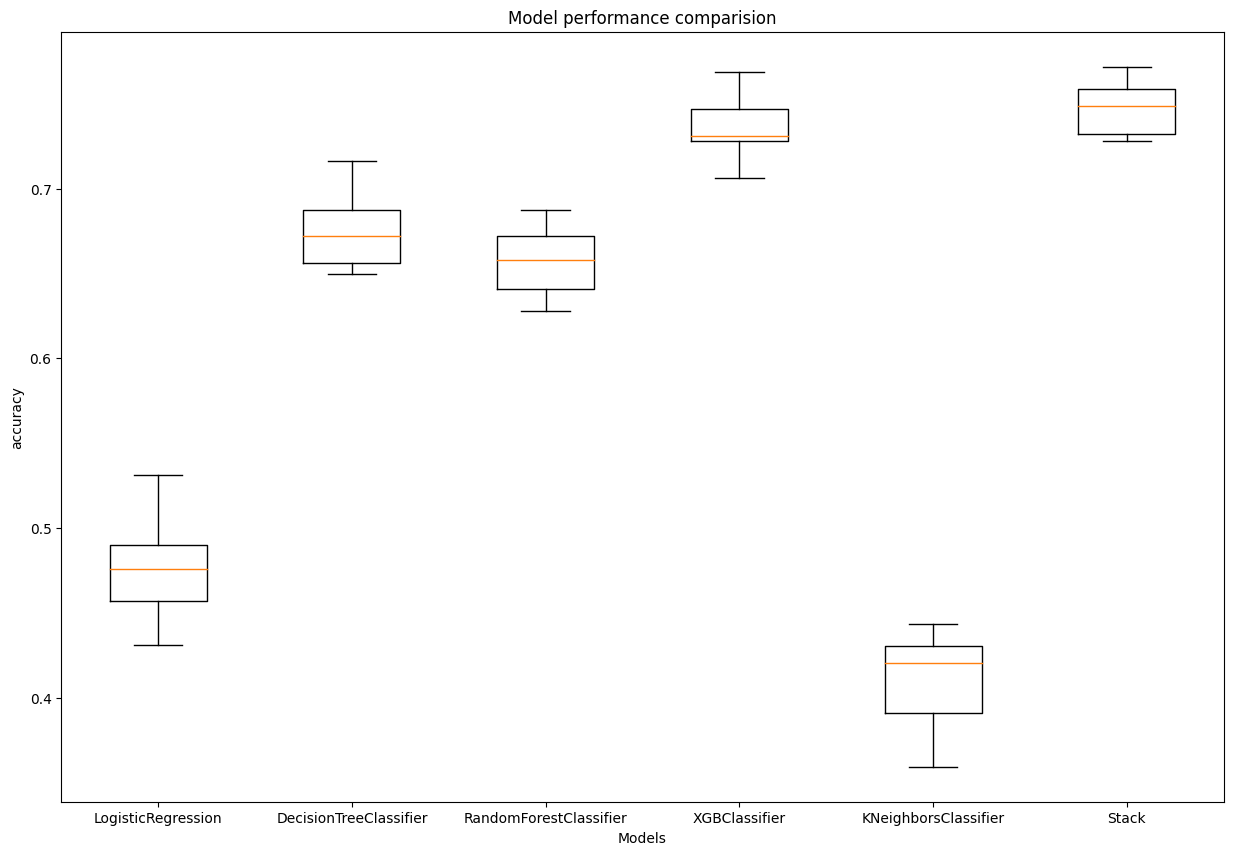

In [132]:
#plot the accuracy of all the models based on Cross Validation
plt.figure(figsize=(15,10))
plt.boxplot(x=results,labels=name)
plt.xlabel('Models')
plt.ylabel('accuracy')
plt.title('Model performance comparision')
plt.show()

##Models Considering Only Drivers:

In [134]:
#create new data frame of driver relevant information
x_d= data[['GP_name','quali_pos','driver','position','driver_reliability','active_driver', 'istest', 'pace', 'avg_pit_stop_time']]
x_d = x_d[x_d['active_driver']==1]
x_d

,GP_name,quali_pos,driver,position,driver_reliability,active_driver,istest,pace,avg_pit_stop_time
0,0,10,5,12,0.942935,1,0,-1133.709232,23.713119
1,0,11,5,12,0.942935,1,0,-1133.709232,23.713119
2,0,3,5,3,0.942935,1,0,-1133.709232,23.713119
3,0,13,5,13,0.942935,1,0,-1133.709232,23.713119
4,0,5,5,5,0.942935,1,0,-1133.709232,23.713119
...,...,...,...,...,...,...,...,...,...
15,32,16,7,14,0.938776,1,1,90.355163,25.380275
16,32,17,8,16,0.916667,1,1,263.106406,25.151899
17,32,18,11,9,0.943620,1,1,-436.667175,23.466431
18,32,19,20,20,0.915493,1,1,2543.576201,24.748397


In [141]:
X_d = x_d
x_test = X_d[X_d['istest'] == 1]
X_d = X_d[X_d['istest'] == 0].drop(['position'], axis=1)
x_test = x_test.drop(['position'],axis = 1)
X_d

,GP_name,quali_pos,driver,driver_reliability,active_driver,istest,pace,avg_pit_stop_time
0,0,10,5,0.942935,1,0,-1133.709232,23.713119
1,0,11,5,0.942935,1,0,-1133.709232,23.713119
2,0,3,5,0.942935,1,0,-1133.709232,23.713119
3,0,13,5,0.942935,1,0,-1133.709232,23.713119
4,0,5,5,0.942935,1,0,-1133.709232,23.713119
...,...,...,...,...,...,...,...,...
3196,25,17,7,0.938776,1,0,90.355163,25.380275
3197,25,13,14,0.914286,1,0,1587.223608,24.385378
3198,25,8,8,0.916667,1,0,263.106406,25.151899
3199,25,14,3,0.946502,1,0,1157.472099,24.144974


In [142]:
sc  = StandardScaler()
le = LabelEncoder()

#Pull out relevant data to use as X and y for models
X_d['GP_name'] = le.fit_transform(X_d['GP_name'])
X_d['driver'] = le.fit_transform(X_d['driver'])
X_d = X_d[X_d['istest']== 0]
X_d = X_d.drop(['istest', 'active_driver'], axis = 1)
y_d = x_d[x_d['istest'] == 0]['position'].apply(lambda x: position_index(x))

In [143]:
X_d

,GP_name,quali_pos,driver,driver_reliability,pace,avg_pit_stop_time
0,0,10,5,0.942935,-1133.709232,23.713119
1,0,11,5,0.942935,-1133.709232,23.713119
2,0,3,5,0.942935,-1133.709232,23.713119
3,0,13,5,0.942935,-1133.709232,23.713119
4,0,5,5,0.942935,-1133.709232,23.713119
...,...,...,...,...,...,...
3196,25,17,7,0.938776,90.355163,25.380275
3197,25,13,14,0.914286,1587.223608,24.385378
3198,25,8,8,0.916667,263.106406,25.151899
3199,25,14,3,0.946502,1157.472099,24.144974


In [146]:
#define our stack
stack_models = [('lr',LogisticRegression(max_iter=100000)),('dt',DecisionTreeClassifier()),('rf',RandomForestClassifier()), ('Knn',KNeighborsClassifier()),('xg',XGBClassifier())]
stacking = StackingClassifier(estimators=stack_models)

In [147]:
#cross validation for diffrent models
from sklearn.model_selection import cross_val_predict

models = [LogisticRegression(max_iter=100000),DecisionTreeClassifier(),RandomForestClassifier(),XGBClassifier(),KNeighborsClassifier(), stacking]
names = ['LogisticRegression','DecisionTreeClassifier','RandomForestClassifier','XGBClassifier','KNeighborsClassifier', 'Stack']
model_dict = dict(zip(models,names))
mean_results_dri = []
results_dri = []
name = []
for model in models:
    cv = StratifiedKFold(n_splits=10,random_state=1, shuffle = True )
    result = cross_val_score(model,X_d,y_d,cv=cv,scoring='accuracy')
    mean_results_dri.append(result.mean())
    results_dri.append(result)
    name.append(model_dict[model])
    print(f'{model_dict[model]} : {result.mean()}')


LogisticRegression : 0.5004624221183801
DecisionTreeClassifier : 0.6813531931464174
RandomForestClassifier : 0.6894772196261683
XGBClassifier : 0.736646222741433
KNeighborsClassifier : 0.4376791277258567
Stack : 0.745392328660436


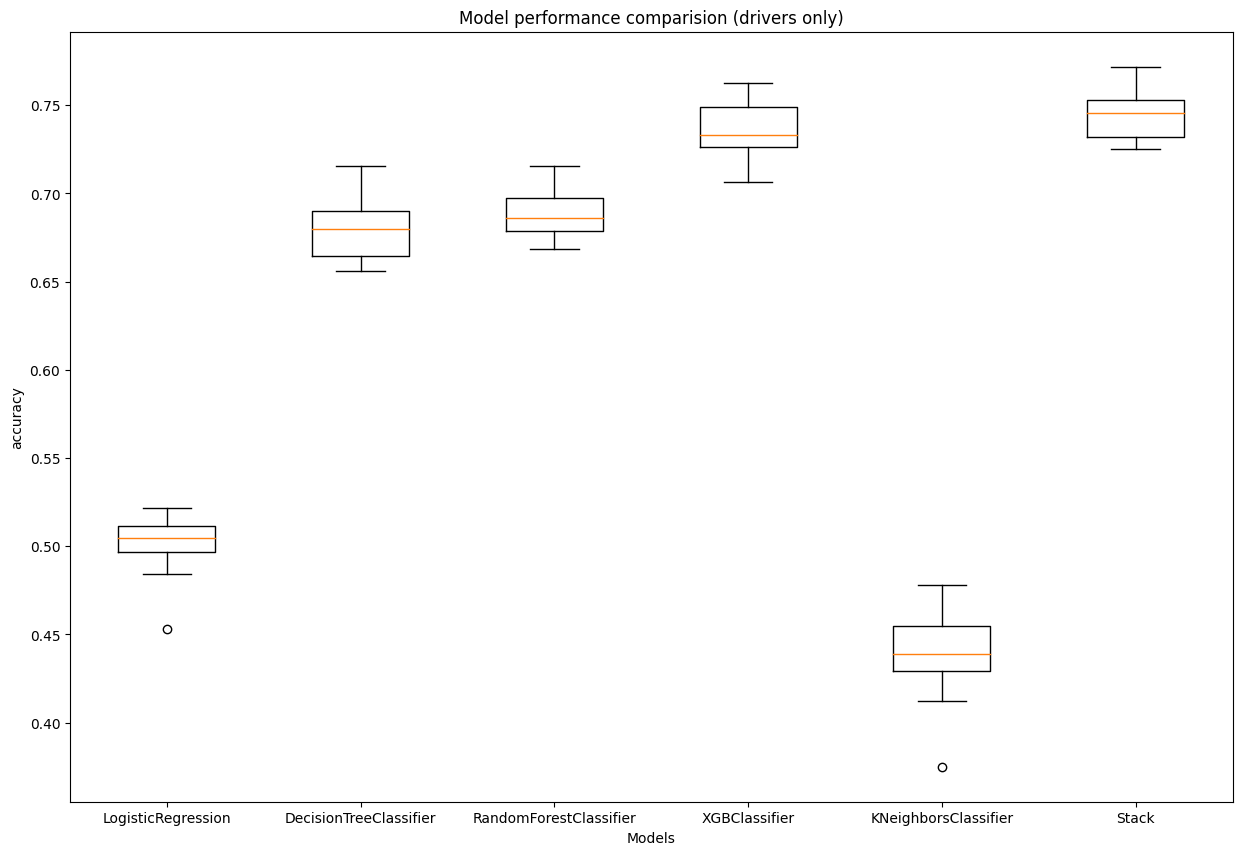

In [148]:
#plot the accuracy of all the models based on Cross Validation
plt.figure(figsize=(15,10))
plt.boxplot(x=results_dri,labels=name)
plt.xlabel('Models')
plt.ylabel('accuracy')
plt.title('Model performance comparision (drivers only)')
plt.show()

##Models Considering Only Consructors:

In [154]:
#select only constructor relevent data
x_c = data[['GP_name','quali_pos','constructor','position','constructor_reliability','active_constructor', 'istest','pace','avg_pit_stop_time']]

In [155]:
#select only active constructors
x_c = x_c[x_c['active_constructor']==1]
x_c = x_c[x_c['istest'] == 0]

In [156]:
#perform data eencodinng and dropping of unecessary columnns
sc  = StandardScaler()
le = LabelEncoder()
x_c['GP_name'] = le.fit_transform(x_c['GP_name'])
x_c['constructor'] = le.fit_transform(x_c['constructor'])
X_c = x_c.drop(['position','active_constructor','istest'],axis=1)
y_c = x_c['position'].apply(lambda x: position_index(x))

In [160]:
#define our stack
stack_models = [('lr',LogisticRegression(max_iter=100000)),('dt',DecisionTreeClassifier()),('rf',RandomForestClassifier()), ('Knn',KNeighborsClassifier()),('xg',XGBClassifier())]
stacking = StackingClassifier(estimators=stack_models)

In [161]:
#cross validation for diffrent models
models = [LogisticRegression(max_iter=100000),DecisionTreeClassifier(),RandomForestClassifier(),XGBClassifier(),KNeighborsClassifier(), stacking]
names = ['LogisticRegression','DecisionTreeClassifier','RandomForestClassifier','XGBClassifier','KNeighborsClassifier','stack']
model_dict = dict(zip(models,names))
mean_results_const = []
results_const = []
name = []
for model in models:
    cv = StratifiedKFold(n_splits=10,random_state=1, shuffle = True )
    result = cross_val_score(model,X_c,y_c,cv=cv,scoring='accuracy')
    mean_results_const.append(result.mean())
    results_const.append(result)
    name.append(model_dict[model])
    print(f'{model_dict[model]} : {result.mean()}')

LogisticRegression : 0.49171534267912775
DecisionTreeClassifier : 0.6775905373831775
RandomForestClassifier : 0.6832194314641744
XGBClassifier : 0.7397653816199378
KNeighborsClassifier : 0.4126927570093458
stack : 0.7472595404984423


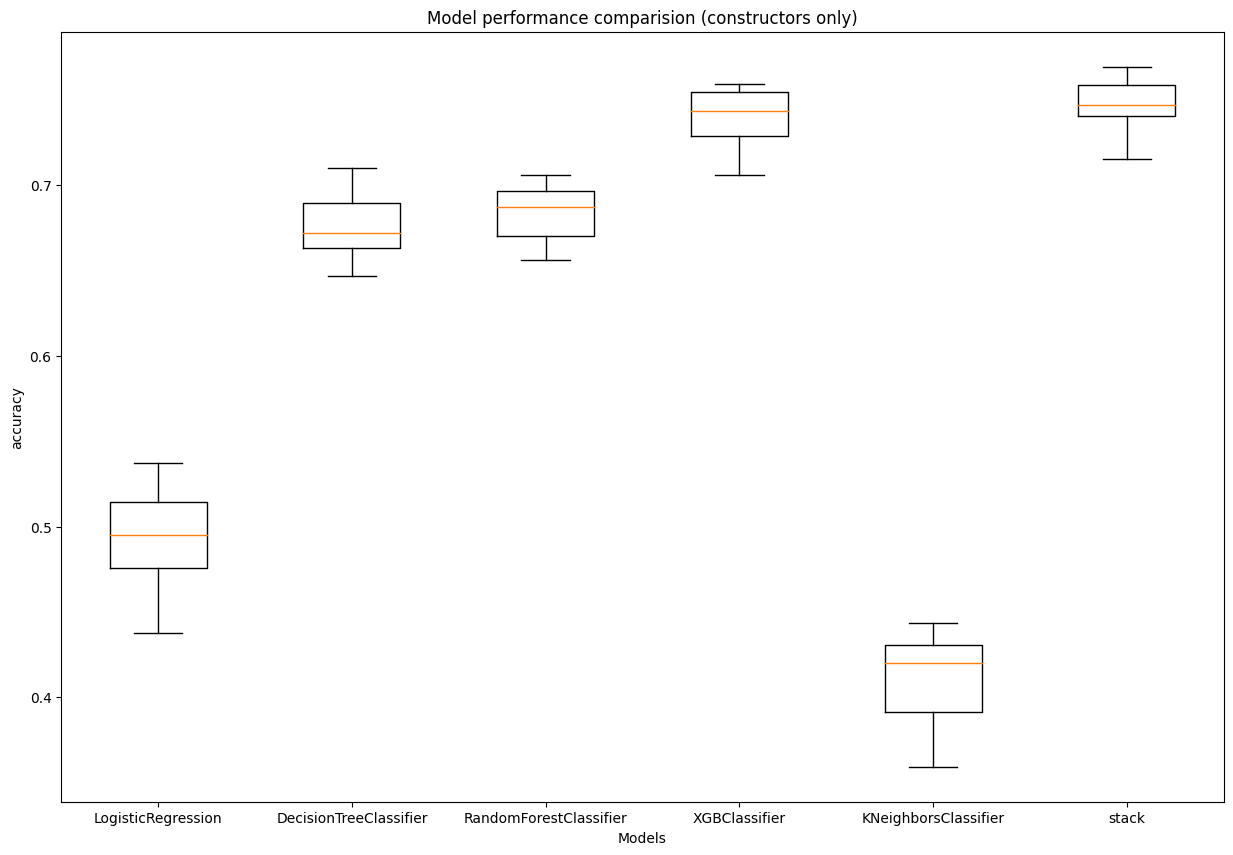

In [162]:
#plot the accuracy of all the models based on Cross Validation
plt.figure(figsize=(15,10))
plt.boxplot(x=results_const,labels=name)
plt.xlabel('Models')
plt.ylabel('accuracy')
plt.title('Model performance comparision (constructors only)')
plt.show()

##Compare Results of each model

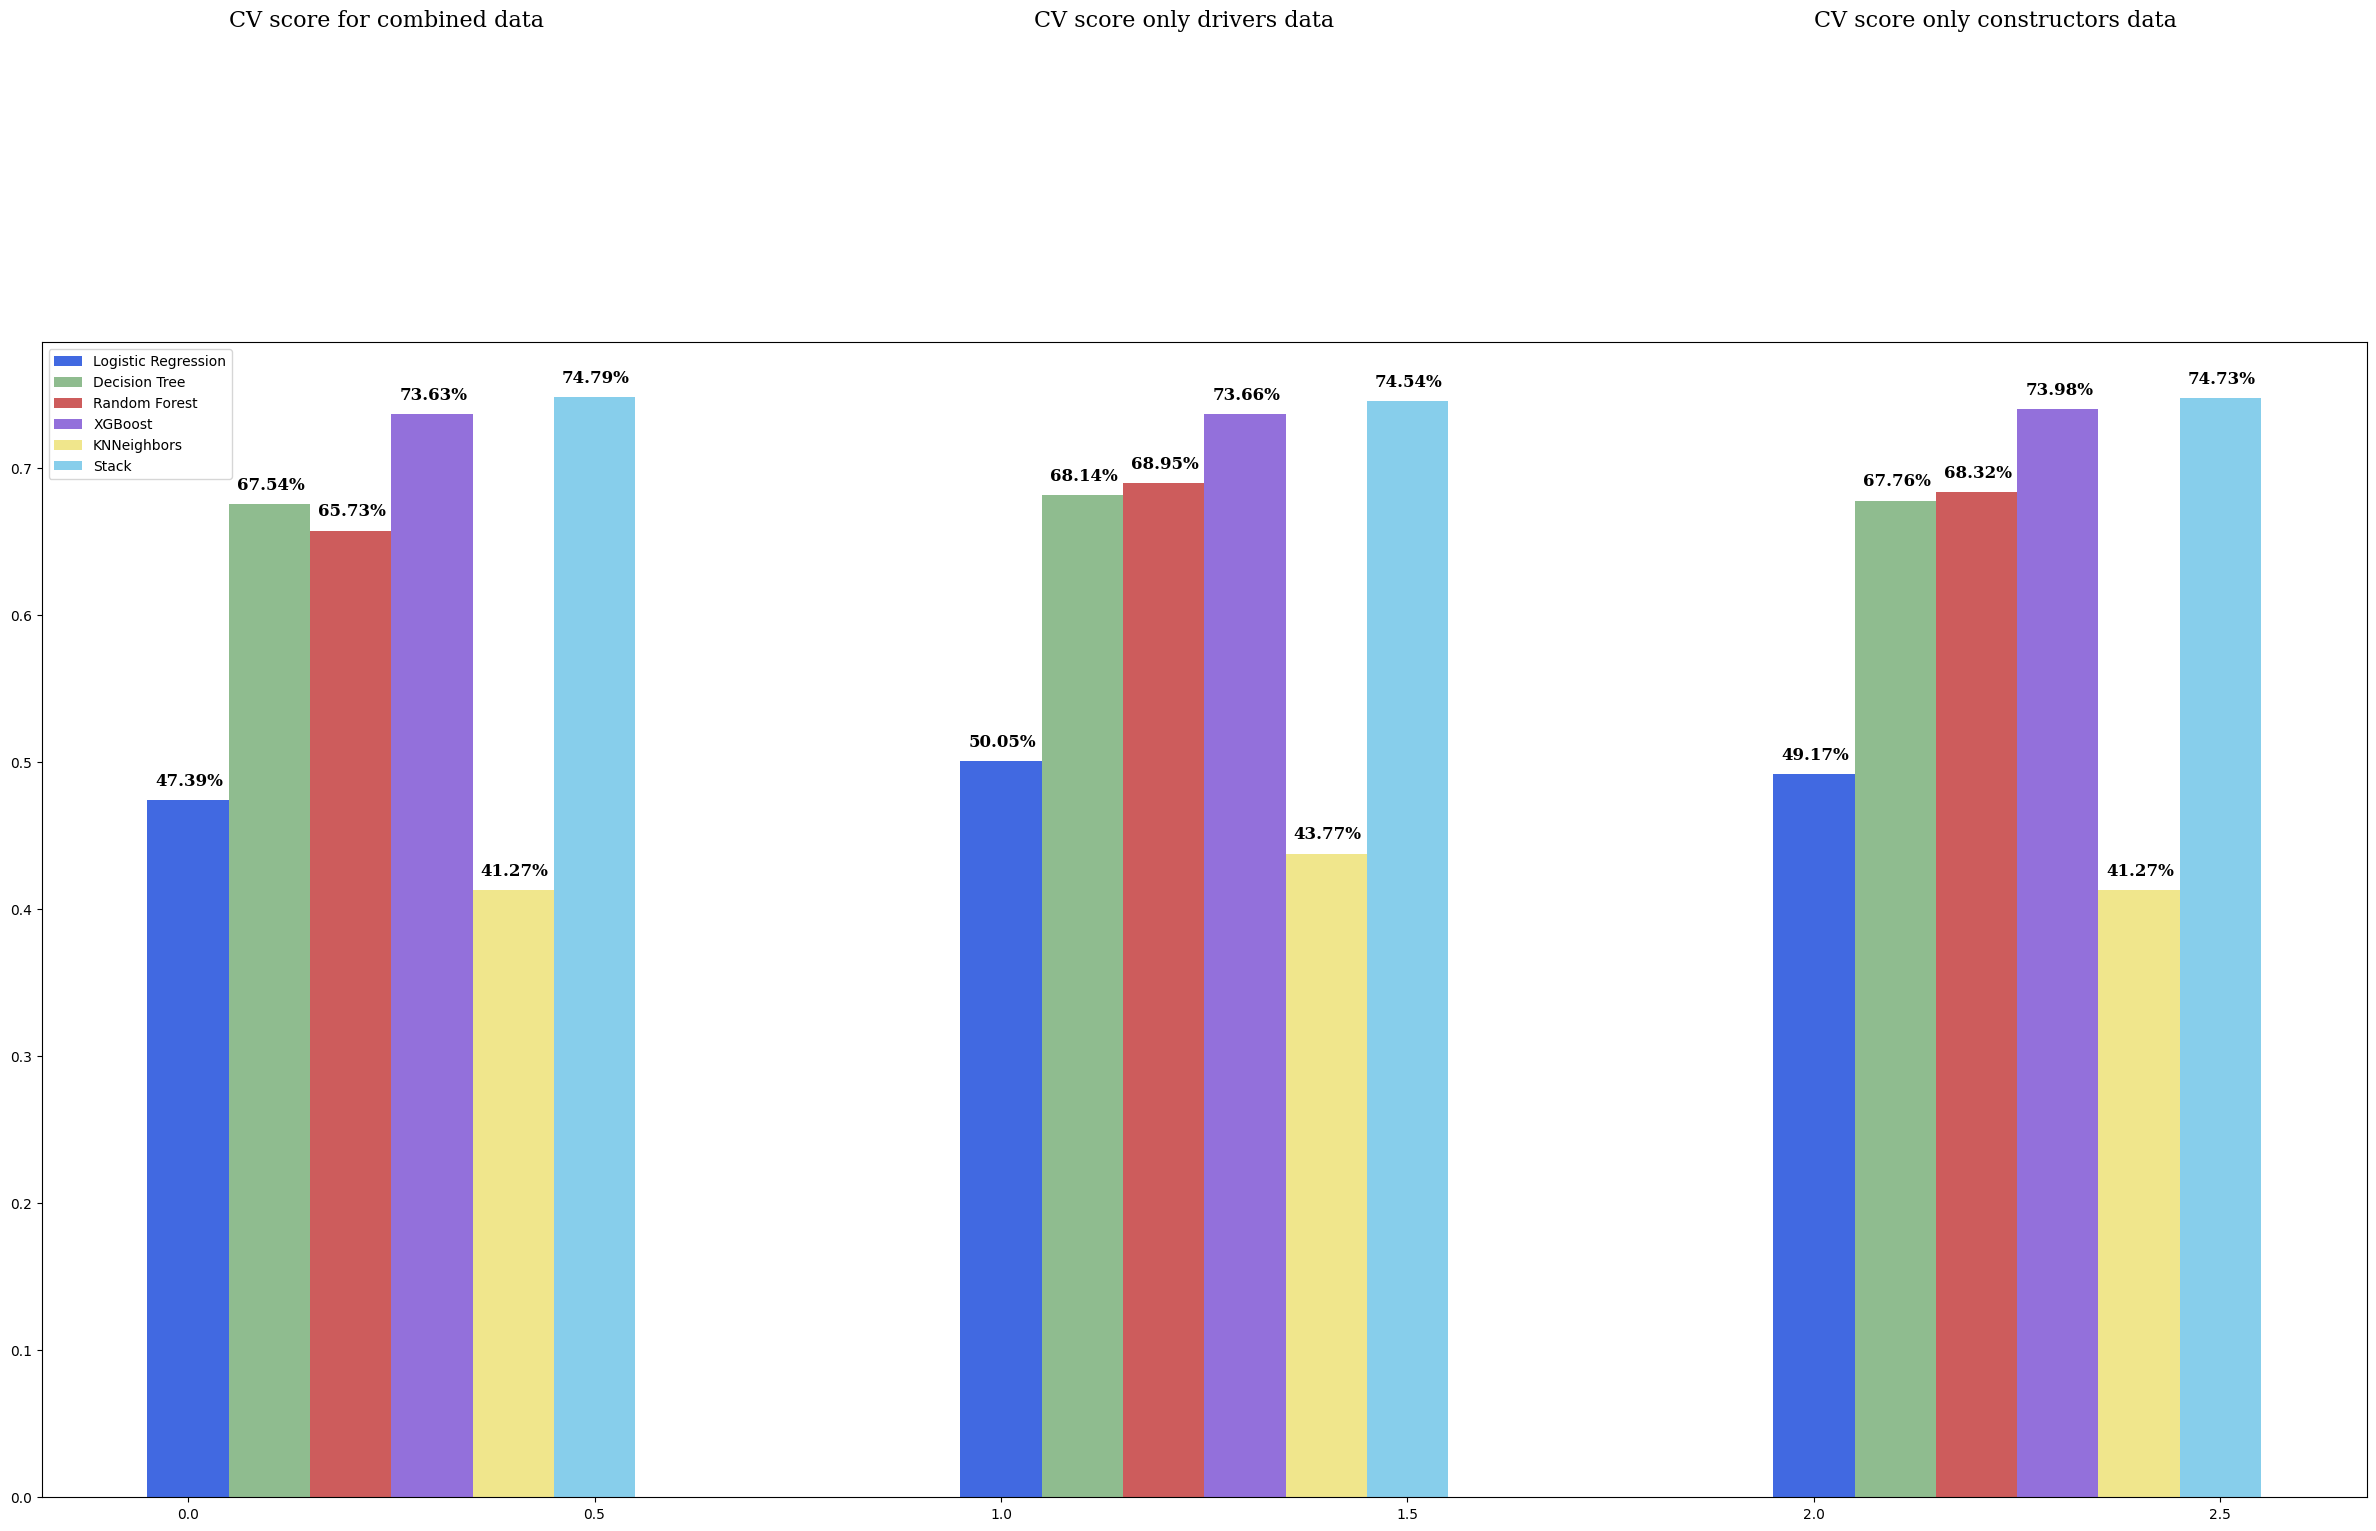

In [165]:
lrc = [mean_results[0],mean_results_dri[0],mean_results_const[0]]
dtc = [mean_results[1],mean_results_dri[1],mean_results_const[1]]
rfc = [mean_results[2],mean_results_dri[2],mean_results_const[2]]
xgbc = [mean_results[3],mean_results_dri[3],mean_results_const[3]]
knnc = [mean_results[4],mean_results_dri[4],mean_results_const[4]]
stkc = [mean_results[5],mean_results_dri[5],mean_results_const[5]]

font1 = {
    'family':'serif',
    'color':'black',
    'weight':'normal',
    'size':16
}
font2 = {
    'family':'serif',
    'color':'black',
    'weight':'bold',
    'size':12
}


x_ax = np.arange(3)
plt.figure(figsize=(30,15))
bar1 = plt.bar(x_ax,lrc,width=0.1,align='center', color='royalblue')
bar2 = plt.bar(x_ax+0.1,dtc,width=0.1,align='center', color='darkseagreen')
bar3 = plt.bar(x_ax+0.2,rfc,width=0.1,align='center', color='indianred')
bar4 = plt.bar(x_ax+0.3,xgbc,width=0.1,align='center', color='mediumpurple')
bar5 = plt.bar(x_ax+0.4,knnc,width=0.1,align='center', color='khaki')
bar6 = plt.bar(x_ax+0.5,stkc,width=0.1,align='center', color='skyblue')
plt.text(0.05,1,'CV score for combined data',fontdict=font1)
plt.text(1.04,1,'CV score only drivers data',fontdict=font1)
plt.text(2,1,'CV score only constructors data',fontdict=font1)

for bar in bar1.patches:
    yval = bar.get_height()
    plt.text(bar.get_x()+0.01,yval+0.01,f'{round(yval*100,2)}%',fontdict=font2)
for bar in bar2.patches:
    yval = bar.get_height()
    plt.text(bar.get_x()+0.01,yval+0.01,f'{round(yval*100,2)}%',fontdict=font2)
for bar in bar3.patches:
    yval = bar.get_height()
    plt.text(bar.get_x()+0.01,yval+0.01,f'{round(yval*100,2)}%',fontdict=font2)
for bar in bar4.patches:
    yval = bar.get_height()
    plt.text(bar.get_x()+0.01,yval+0.01,f'{round(yval*100,2)}%',fontdict=font2)
for bar in bar5.patches:
    yval = bar.get_height()
    plt.text(bar.get_x()+0.01,yval+0.01,f'{round(yval*100,2)}%',fontdict=font2)
for bar in bar6.patches:
    yval = bar.get_height()
    plt.text(bar.get_x()+0.01,yval+0.01,f'{round(yval*100,2)}%',fontdict=font2)

plt.legend(['Logistic Regression','Decision Tree','Random Forest','XGBoost','KNNeighbors','Stack'], loc='upper left')

plt.show()

##Predict using First Stack Model on Test Data

In [210]:
sc  = StandardScaler()
le = LabelEncoder()

#Pull out relevant data to use as X and y for models
x = data
x['GP_name'] = le.fit_transform(x['GP_name'])
x['constructor'] = le.fit_transform(x['constructor'])
x['driver'] = le.fit_transform(x['driver'])
x['GP_name'] = le.fit_transform(x['GP_name'])
X = x.drop(['position','active_driver','active_constructor', 'dob'],axis = 1)
X_test_new = X[X['istest'] == 1]
X = X[X['istest']== 0]
y = x[x['istest'] == 0]['position'].apply(lambda x: position_index(x))
y_test = x[x['istest'] == 1]['position'].apply(lambda x: position_index(x))

In [211]:
X_test_new = X_test_new.drop('istest', axis=1)
X= X.drop('istest', axis=1)
X_test_new

,GP_name,quali_pos,constructor,driver,driver_reliability,constructor_reliability,pace,avg_pit_stop_time
0,7,1,7,13,0.921053,0.790107,-1400.093169,24.153271
1,7,2,2,2,0.907692,0.864183,-1424.098413,24.229096
2,7,3,6,6,0.926606,0.897521,-1581.756631,24.681442
3,7,4,2,1,0.904255,0.864183,-624.803470,24.778939
4,7,5,7,18,0.935361,0.790107,967.479546,24.065754
...,...,...,...,...,...,...,...,...
15,32,16,4,7,0.938776,0.414244,90.355163,25.380275
16,32,17,3,8,0.916667,0.384164,263.106406,25.151899
17,32,18,6,11,0.943620,0.897521,-436.667175,23.466431
18,32,19,8,20,0.915493,0.485190,2543.576201,24.748397


In [170]:
#define our stack
cv = StratifiedKFold(n_splits=10,random_state=1, shuffle = True)
stack_models = [('lr',LogisticRegression(max_iter=100000)),('dt',DecisionTreeClassifier()),('rf',RandomForestClassifier()), ('Knn',KNeighborsClassifier()),('xg',XGBClassifier())]
stack = StackingClassifier(estimators=stack_models, cv=cv)

In [171]:
stack.fit(X,y)

StackingClassifier(cv=StratifiedKFold(n_splits=10, random_state=1, shuffle=True),
                   estimators=[('lr', LogisticRegression(max_iter=100000)),
                               ('dt', DecisionTreeClassifier()),
                               ('rf', RandomForestClassifier()),
                               ('Knn', KNeighborsClassifier()),
                               ('xg',
                                XGBClassifier(base_score=None, booster=None,
                                              callbacks=None,
                                              colsample_bylevel=None,
                                              colsample_bynode=None,
                                              colsample_by...
                                              grow_policy=None,
                                              importance_type=None,
                                              interaction_constraints=None,
                                              learning_rate=None, max_bin=None,
                                              max_cat_threshold=None,
                                              max_cat_to_onehot=None,
                                              max_delta_step=None,
                                              max_depth=None, max_leaves=None,
                                              min_child_weight=None,
                                              missing=nan,
                                              monotone_constraints=None,
                                              multi_strategy=None,
                                              n_estimators=None, n_jobs=None,
                                              num_parallel_tree=None,
                                              random_state=None, ...))])

In [213]:
#predict with model
y_pred = stack.predict(X_test_new)
diff = np.array(np.abs(y_pred - y_test))

In [215]:
# look at Results
acc_0 = 0;
acc_1 = 0;
acc_2 = 0;
acc_3 = 0;
acc_4 = 0

for i in range(100):
  if(diff[i] ==0):
    acc_0 = acc_0 +1
  if(diff[i] <= 1):
    acc_1 = acc_1 +1
  if(diff[i] <= 2):
    acc_2 = acc_2 +1
  if(diff[i] <= 3):
    acc_3 = acc_3 +1
  if(diff[i] <= 4):
    acc_4 = acc_4 +1

acc_0, acc_1, acc_2, acc_3,acc_4 = acc_0/100, acc_1/100, acc_2/100, acc_3/100,acc_4/100
print('accuracy with error plus/minus zero positions: ',acc_0)
print('accuracy with error plus/minus one position: ',acc_1)
print('accuracy with error plus/minus two positions: ',acc_2)
print('accuracy with error plus/minus three positions: ',acc_3)
print('accuracy with error plus/minus three positions: ',acc_4)

accuracy with error plus/minus zero positions:  0.29
accuracy with error plus/minus one position:  0.54
accuracy with error plus/minus two positions:  0.76
accuracy with error plus/minus three positions:  0.87
accuracy with error plus/minus three positions:  0.95


In [216]:
#create confusion matrix
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns



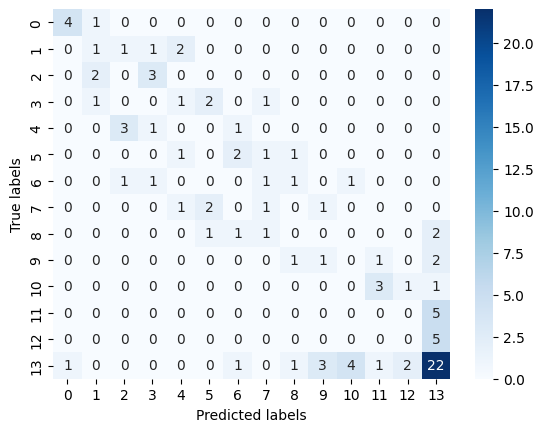

In [217]:
# assume y_true and y_pred are the true and predicted labels
cm = confusion_matrix(y_test, y_pred)

# plot the confusion matrix
sns.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

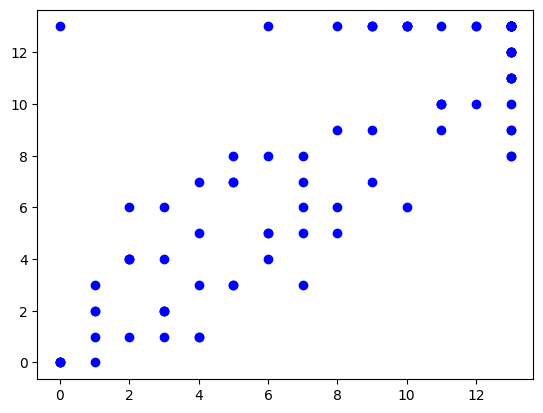

In [221]:
plt.plot(y_pred,y_test, 'bo')

##Prediction on 2023

In [235]:
#get race qualifying info for abudabi
abudabi_gp_quali = quali[quali['raceId'] == 1120]
abudabi_gp_drivers = []

In [237]:
#get drivers of abudabi
for driver_id in abudabi_gp_quali['driverId']:
    driver_row = drivers.loc[drivers['driverId'] == driver_id]
    forename = str(driver_row['forename'].values[0])
    surname = str(driver_row['surname'].values[0])
    driver_name = forename + ' ' + surname
    abudabi_gp_drivers.append(driver_name)

In [244]:
#get driiver reliabilitis for test races
clean = pd.read_csv("cleaned_data.csv")
clean_unique = clean.drop_duplicates(subset=['driver'])

abudabi_gp_driver_reliabilities = []

#get abudabi driver reliabilities
for driver in abudabi_gp_drivers:
    driver_row = clean_unique.loc[clean_unique['driver'] == driver]
    reliability = driver_row['driver_reliability'].values[0]
    abudabi_gp_driver_reliabilities.append(reliability)

abudabi_gp_constructors=['Red Bull', 'Ferrari', 'McLaren', 'Mercedes', 'McLaren', 'Visa Cashapp Redbull', 'Aston Martin','Haas F1 Team','Red Bull', 'Alpine', 'Mercedes', 'Alpine', 'Aston Martin', 'Williams', 'Visa Cashapp Redbull', 'Ferrari', 'Haas F1 Team', 'Kick Sauber','Kick Sauber', 'Williams' ]


clean_unique_2 = clean.drop_duplicates(subset=['constructor'])


In [245]:
# assign constructor reliabilities
abudabi_gp_constructor_reliabilities = []

#get abudabi constructor reliabilities
for constructor in abudabi_gp_constructors:
    constructor_row = clean_unique_2.loc[clean_unique_2['constructor'] == constructor]
    reliability = constructor_row['constructor_reliability'].values[0]
    abudabi_gp_constructor_reliabilities.append(reliability)

#compile abudabi data
abudabi_data = {
    'GP_name': ['Yas Marina Circuit','Yas Marina Circuit','Yas Marina Circuit','Yas Marina Circuit','Yas Marina Circuit','Yas Marina Circuit','Yas Marina Circuit','Yas Marina Circuit','Yas Marina Circuit','Yas Marina Circuit','Yas Marina Circuit','Yas Marina Circuit','Yas Marina Circuit','Yas Marina Circuit','Yas Marina Circuit','Yas Marina Circuit','Yas Marina Circuit','Yas Marina Circuit','Yas Marina Circuit','Yas Marina Circuit'],
    'quali_pos': [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20],
    'constructor': abudabi_gp_constructors,
    'driver': abudabi_gp_drivers,
    'driver_reliability': abudabi_gp_driver_reliabilities,
    'constructor_reliability': abudabi_gp_constructor_reliabilities,
    'active_driver': [1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1],
    'active_constructor': [1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1],
    'dob': [1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1],
    'position': [1,2,6,3,5,8,7,15,4,13,9,12,10,14,11,18,20,19,17,16]
}

In [262]:
X = pd.DataFrame(abudabi_data)
y_true = X['position']
X = X.drop(['active_driver', 'active_constructor','dob','position'], axis=1)


In [273]:
X['pace']= X['driver'].apply(lambda x: getPace(x))
X['avg_pit_stop_time'] = X['driver'].apply(lambda x: get_duration(x))
X

,GP_name,quali_pos,constructor,driver,driver_reliability,constructor_reliability,pace,avg_pit_stop_time
0,Yas Marina Circuit,1,Red Bull,Max Verstappen,0.921053,0.790107,-1400.093169,24.144974
1,Yas Marina Circuit,2,Ferrari,Charles Leclerc,0.907692,0.864183,-1424.098413,24.153271
2,Yas Marina Circuit,3,McLaren,Oscar Piastri,0.962963,0.676719,1902.514632,24.778939
3,Yas Marina Circuit,4,Mercedes,George Russell,0.926606,0.897521,-1581.756631,23.713119
4,Yas Marina Circuit,5,McLaren,Lando Norris,0.954128,0.676719,-300.307296,25.215791
5,Yas Marina Circuit,6,Visa Cashapp Redbull,Yuki Tsunoda,0.915493,0.485190,2543.576201,24.652479
6,Yas Marina Circuit,7,Aston Martin,Fernando Alonso,0.942935,0.624025,-1133.709232,24.385378
7,Yas Marina Circuit,8,Haas F1 Team,Nico Hülkenberg,0.914286,0.384164,1587.223608,24.229096
8,Yas Marina Circuit,9,Red Bull,Sergio Pérez,0.935361,0.790107,967.479546,24.836227
9,Yas Marina Circuit,10,Alpine,Pierre Gasly,0.925373,0.565996,-1013.444937,24.748397


In [276]:
sc  = StandardScaler()
le = LabelEncoder()

#Pull out relevant data to use as X and y for models

X['GP_name'] = le.fit_transform(X['GP_name'])
X['constructor'] = le.fit_transform(X['constructor'])
X['driver'] = le.fit_transform(X['driver'])


In [277]:
#predict with model
y_pred = stack.predict(X)
diff = np.array(np.abs(y_pred - y_true))

In [280]:
# look at Results
acc_0 = 0;
acc_1 = 0;
acc_2 = 0;
acc_3 = 0;
acc_4 = 0

for i in range(20):
  if(diff[i] ==0):
    acc_0 = acc_0 +1
  if(diff[i] <= 1):
    acc_1 = acc_1 +1
  if(diff[i] <= 2):
    acc_2 = acc_2 +1
  if(diff[i] <= 3):
    acc_3 = acc_3 +1
  if(diff[i] <= 4):
    acc_4 = acc_4 +1

acc_0, acc_1, acc_2, acc_3,acc_4 = acc_0/20, acc_1/20, acc_2/20, acc_3/20,acc_4/20
print('accuracy with error plus/minus zero positions: ',acc_0)
print('accuracy with error plus/minus one position: ',acc_1)
print('accuracy with error plus/minus two positions: ',acc_2)
print('accuracy with error plus/minus three positions: ',acc_3)
print('accuracy with error plus/minus four positions: ',acc_4)

accuracy with error plus/minus zero positions:  0.05
accuracy with error plus/minus one position:  0.35
accuracy with error plus/minus two positions:  0.45
accuracy with error plus/minus three positions:  0.6
accuracy with error plus/minus four positions:  0.8
